<a href="https://colab.research.google.com/github/chingyaousf/Oral-Squamous-Cell-Carcinoma-CRISPR_gene_Dep-Prediction-by-ML/blob/main/scripts/MLpredictionDep_05_Model_KNN_SF3B1_Oral_Squamous.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [55]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/filtered_arranged_table_Oral_Squamous.csv")
data

,DepMap_ID,A1BG (1) Exp,A1CF (29974) Exp,A2M (2) Exp,A2ML1 (144568) Exp,A3GALT2 (127550) Exp,A4GALT (53947) Exp,A4GNT (51146) Exp,AAAS (8086) Exp,AACS (65985) Exp,...,ZYG11A (440590) Exp,ZYG11B (79699) Exp,ZYX (7791) Exp,ZZEF1 (23140) Exp,ZZZ3 (26009) Exp,EIF2AK3 (9451) Dep,MYC (4609) Dep,NQO1 (1728) Dep,SF3B1 (23451) Dep,SQSTM1 (8878) Dep
0,ACH-000181,4.238023,0.056584,0.111031,4.206331,0.000000,5.802193,0.042644,4.758623,4.022368,...,2.313246,2.462052,5.465974,4.342697,3.725741,0.074646,0.999686,0.267469,1.000000,0.080037
1,ACH-000188,2.432959,0.014355,0.189034,0.298658,0.000000,3.928844,0.028569,5.015694,3.403268,...,0.014355,1.097611,5.661921,2.650765,2.185867,0.052718,0.961044,0.094218,0.963732,0.068937
2,ACH-000228,5.128871,0.014355,0.150560,3.758090,0.056584,5.972233,0.000000,5.498570,4.773996,...,1.422233,2.330558,6.575766,3.486714,2.691534,0.156112,0.988692,0.070409,0.993455,0.036775
3,ACH-000238,3.117695,0.070389,0.163499,4.870858,0.000000,5.693766,0.250962,5.144862,3.732269,...,0.028569,1.970854,5.786335,2.847997,4.270529,0.010761,0.997741,0.039210,0.997330,0.026842
4,ACH-000472,0.555816,0.028569,0.189034,0.650765,0.000000,2.195348,0.084064,4.704872,3.203201,...,0.584963,1.454176,5.126808,3.407353,3.764474,0.078337,0.999853,0.107000,0.999991,0.072139
5,ACH-000503,2.809414,0.028569,0.124328,4.440952,0.000000,4.280956,0.000000,4.626439,4.581954,...,0.963474,2.192194,6.153197,3.140779,3.288359,0.036254,1.000000,0.038261,0.999988,0.019149
6,ACH-000518,0.632268,0.014355,0.042644,0.250962,0.000000,5.150966,0.176323,5.780573,3.709291,...,0.286881,2.801159,6.649615,4.120186,3.599318,0.049299,0.997556,0.057228,0.996603,0.055766
7,ACH-000546,0.475085,0.042644,0.150560,0.713696,0.000000,4.104337,0.475085,5.367022,4.557655,...,0.214125,2.613532,4.647315,3.802193,3.825786,0.045031,0.999991,0.032847,0.999925,0.033679
8,ACH-000548,2.859970,0.014355,0.422233,2.797013,0.000000,4.319762,0.356144,5.359310,4.672425,...,0.028569,1.970854,6.375561,3.693766,3.690417,0.099956,1.000000,0.256338,1.000000,0.052276
9,ACH-000606,0.333424,0.000000,0.201634,0.739848,0.000000,3.430285,0.000000,5.051372,3.393691,...,0.042644,2.042644,5.304511,2.931683,3.382667,0.008650,0.986207,0.018890,0.975153,0.038666


In [14]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/SF3B1_Oral_Squamous_gt_00.csv")
data

,DepMap_ID,A1BG (1) Exp,A2ML1 (144568) Exp,A3GALT2 (127550) Exp,A4GALT (53947) Exp,A4GNT (51146) Exp,AACS (65985) Exp,AADAC (13) Exp,AADACL2 (344752) Exp,AADACL3 (126767) Exp,...,ZXDB (158586) Exp,ZXDC (79364) Exp,ZYG11A (440590) Exp,ZYX (7791) Exp,ZZEF1 (23140) Exp,EIF2AK3 (9451) Dep,MYC (4609) Dep,NQO1 (1728) Dep,SF3B1 (23451) Dep,SQSTM1 (8878) Dep
0,ACH-000181,4.238023,4.206331,0.000000,5.802193,0.042644,4.022368,0.000000,0.422233,0.263034,...,2.272023,4.343408,2.313246,5.465974,4.342697,0.074646,0.999686,0.267469,1.000000,0.080037
1,ACH-000188,2.432959,0.298658,0.000000,3.928844,0.028569,3.403268,0.941106,0.000000,0.000000,...,1.280956,2.693766,0.014355,5.661921,2.650765,0.052718,0.961044,0.094218,0.963732,0.068937
2,ACH-000228,5.128871,3.758090,0.056584,5.972233,0.000000,4.773996,0.790772,0.014355,0.000000,...,3.090853,4.077243,1.422233,6.575766,3.486714,0.156112,0.988692,0.070409,0.993455,0.036775
3,ACH-000238,3.117695,4.870858,0.000000,5.693766,0.250962,3.732269,0.056584,0.000000,0.000000,...,1.448901,3.917432,0.028569,5.786335,2.847997,0.010761,0.997741,0.039210,0.997330,0.026842
4,ACH-000472,0.555816,0.650765,0.000000,2.195348,0.084064,3.203201,1.333424,0.000000,0.000000,...,1.201634,3.240314,0.584963,5.126808,3.407353,0.078337,0.999853,0.107000,0.999991,0.072139
5,ACH-000503,2.809414,4.440952,0.000000,4.280956,0.000000,4.581954,0.028569,0.000000,0.000000,...,3.042644,2.769772,0.963474,6.153197,3.140779,0.036254,1.000000,0.038261,0.999988,0.019149
6,ACH-000518,0.632268,0.250962,0.000000,5.150966,0.176323,3.709291,0.641546,0.000000,0.000000,...,2.176323,4.693766,0.286881,6.649615,4.120186,0.049299,0.997556,0.057228,0.996603,0.055766
7,ACH-000546,0.475085,0.713696,0.000000,4.104337,0.475085,4.557655,0.111031,0.042644,0.000000,...,1.695994,4.056584,0.214125,4.647315,3.802193,0.045031,0.999991,0.032847,0.999925,0.033679
8,ACH-000548,2.859970,2.797013,0.000000,4.319762,0.356144,4.672425,3.228049,0.000000,0.000000,...,2.150560,4.311067,0.028569,6.375561,3.693766,0.099956,1.000000,0.256338,1.000000,0.052276
9,ACH-000606,0.333424,0.739848,0.000000,3.430285,0.000000,3.393691,0.137504,0.000000,0.000000,...,1.422233,3.537296,0.042644,5.304511,2.931683,0.008650,0.986207,0.018890,0.975153,0.038666


In [27]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/SF3B1_Oral_Squamous_gt_01.csv")
data

,DepMap_ID,AARD (441376) Exp,ABCC12 (94160) Exp,ABCD1 (215) Exp,ABHD11 (83451) Exp,ACAN (176) Exp,ACOT6 (641372) Exp,ADAM15 (8751) Exp,ADAMTSL3 (57188) Exp,ADCY6 (112) Exp,...,ZER1 (10444) Exp,ZFP57 (346171) Exp,ZFPL1 (7542) Exp,ZFYVE21 (79038) Exp,ZNF135 (7694) Exp,EIF2AK3 (9451) Dep,MYC (4609) Dep,NQO1 (1728) Dep,SF3B1 (23451) Dep,SQSTM1 (8878) Dep
0,ACH-000181,0.014355,0.000000,2.073820,4.374344,0.014355,0.014355,7.097189,0.150560,3.388190,...,3.471187,1.910733,5.562548,5.043957,0.000000,0.074646,0.999686,0.267469,1.000000,0.080037
1,ACH-000188,0.000000,0.000000,2.641546,3.317594,0.014355,0.042644,5.643568,0.137504,1.321928,...,3.432959,0.765535,4.797013,5.152589,0.000000,0.052718,0.961044,0.094218,0.963732,0.068937
2,ACH-000228,0.650765,0.000000,3.001802,4.289097,0.000000,0.000000,6.425929,1.510962,3.549669,...,4.432291,0.111031,6.414474,5.307064,0.014355,0.156112,0.988692,0.070409,0.993455,0.036775
3,ACH-000238,0.070389,0.000000,3.829850,5.574404,0.056584,0.000000,5.955127,1.007196,1.622930,...,3.003602,2.010780,5.681730,5.848498,0.176323,0.010761,0.997741,0.039210,0.997330,0.026842
4,ACH-000472,0.028569,0.000000,1.021480,4.464668,0.201634,0.000000,5.078097,0.056584,2.456806,...,3.012569,0.333424,5.253611,4.590961,0.000000,0.078337,0.999853,0.107000,0.999991,0.072139
5,ACH-000503,0.042644,0.000000,1.627607,4.100978,0.028569,0.042644,5.795715,0.565597,2.163499,...,4.768714,0.790772,5.588565,5.305241,0.545968,0.036254,1.000000,0.038261,0.999988,0.019149
6,ACH-000518,0.056584,0.000000,3.661065,4.971773,0.000000,0.056584,7.827247,0.201634,4.837439,...,5.146492,0.111031,5.729553,6.003377,0.000000,0.049299,0.997556,0.057228,0.996603,0.055766
7,ACH-000546,0.042644,0.000000,3.244887,4.596935,0.367371,0.070389,5.952799,1.286881,3.926948,...,4.529821,0.084064,5.427941,5.159871,0.028569,0.045031,0.999991,0.032847,0.999925,0.033679
8,ACH-000548,0.137504,0.028569,2.485427,4.396434,0.000000,0.298658,7.001127,0.042644,4.448240,...,4.442943,1.769772,6.302502,5.795715,0.042644,0.099956,1.000000,0.256338,1.000000,0.052276
9,ACH-000606,0.000000,0.014355,2.247928,4.220330,0.000000,0.000000,6.473300,1.887525,1.298658,...,4.111031,0.028569,6.331813,5.926948,0.000000,0.008650,0.986207,0.018890,0.975153,0.038666


In [40]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/SF3B1_Oral_Squamous_ng_01.csv")
data

,DepMap_ID,ABCE1 (6059) Exp,ABRAXAS1 (84142) Exp,ACADM (34) Exp,ADH5 (128) Exp,AFMID (125061) Exp,ALKBH8 (91801) Exp,ANAPC10 (10393) Exp,ANP32A (8125) Exp,ARL6IP6 (151188) Exp,...,ZNF277 (11179) Exp,ZNF280C (55609) Exp,ZNF330 (27309) Exp,ZNF438 (220929) Exp,ZUP1 (221302) Exp,EIF2AK3 (9451) Dep,MYC (4609) Dep,NQO1 (1728) Dep,SF3B1 (23451) Dep,SQSTM1 (8878) Dep
0,ACH-000181,5.212180,2.063503,3.805292,5.947199,4.678072,2.361768,3.577731,5.475409,4.546586,...,2.853996,1.411426,4.761285,1.646163,4.009885,0.074646,0.999686,0.267469,1.000000,0.080037
1,ACH-000188,4.996389,0.669027,2.788686,6.661636,3.848998,2.364572,3.822730,7.024696,4.259272,...,2.584963,1.049631,3.989139,1.405992,2.889474,0.052718,0.961044,0.094218,0.963732,0.068937
2,ACH-000228,4.858478,1.536053,3.593354,6.175924,4.215679,1.765535,3.625270,6.707635,4.573496,...,3.538538,0.815575,4.441616,1.855990,3.044394,0.156112,0.988692,0.070409,0.993455,0.036775
3,ACH-000238,5.603181,1.867896,4.997744,6.336105,3.941106,2.097611,4.484138,7.127324,4.925525,...,3.190615,1.989139,4.958843,1.014355,4.100978,0.010761,0.997741,0.039210,0.997330,0.026842
4,ACH-000472,4.814550,1.475085,4.204767,5.559492,4.725741,3.001802,3.484138,6.180506,3.471187,...,3.072106,1.316146,4.027685,0.748461,2.970854,0.078337,0.999853,0.107000,0.999991,0.072139
5,ACH-000503,4.956521,2.179511,3.876762,6.032982,4.349082,1.541019,3.841973,6.974873,3.129283,...,4.190615,1.070389,4.184280,0.910733,2.849999,0.036254,1.000000,0.038261,0.999988,0.019149
6,ACH-000518,5.679762,1.604071,4.585563,7.116032,4.589763,2.176323,4.339850,6.913847,4.499527,...,3.349082,1.176323,5.233044,0.516015,3.936402,0.049299,0.997556,0.057228,0.996603,0.055766
7,ACH-000546,4.666188,1.584963,4.705978,5.750070,4.095924,2.235727,3.490570,7.746581,3.981853,...,2.422233,1.555816,4.027685,1.356144,3.185867,0.045031,0.999991,0.032847,0.999925,0.033679
8,ACH-000548,4.968552,1.918386,3.951401,5.830357,4.591560,2.702658,3.538538,6.884232,4.697663,...,3.952334,1.713696,4.666757,1.333424,3.705978,0.099956,1.000000,0.256338,1.000000,0.052276
9,ACH-000606,4.797532,1.214125,3.929791,6.314153,5.376429,1.906891,3.693766,8.114211,4.572283,...,3.319040,1.361768,4.006298,1.028569,3.204767,0.008650,0.986207,0.018890,0.975153,0.038666


In [56]:
from numpy import true_divide
# Cleaning Column Names
clean_column_names = {}
for column in data.columns:
    clean_column_names[column] = column.strip().replace(' ', '_').replace('(', '').replace(')', '')

data.rename(columns=clean_column_names, inplace=True)
data

,DepMap_ID,A1BG_1_Exp,A1CF_29974_Exp,A2M_2_Exp,A2ML1_144568_Exp,A3GALT2_127550_Exp,A4GALT_53947_Exp,A4GNT_51146_Exp,AAAS_8086_Exp,AACS_65985_Exp,...,ZYG11A_440590_Exp,ZYG11B_79699_Exp,ZYX_7791_Exp,ZZEF1_23140_Exp,ZZZ3_26009_Exp,EIF2AK3_9451_Dep,MYC_4609_Dep,NQO1_1728_Dep,SF3B1_23451_Dep,SQSTM1_8878_Dep
0,ACH-000181,4.238023,0.056584,0.111031,4.206331,0.000000,5.802193,0.042644,4.758623,4.022368,...,2.313246,2.462052,5.465974,4.342697,3.725741,0.074646,0.999686,0.267469,1.000000,0.080037
1,ACH-000188,2.432959,0.014355,0.189034,0.298658,0.000000,3.928844,0.028569,5.015694,3.403268,...,0.014355,1.097611,5.661921,2.650765,2.185867,0.052718,0.961044,0.094218,0.963732,0.068937
2,ACH-000228,5.128871,0.014355,0.150560,3.758090,0.056584,5.972233,0.000000,5.498570,4.773996,...,1.422233,2.330558,6.575766,3.486714,2.691534,0.156112,0.988692,0.070409,0.993455,0.036775
3,ACH-000238,3.117695,0.070389,0.163499,4.870858,0.000000,5.693766,0.250962,5.144862,3.732269,...,0.028569,1.970854,5.786335,2.847997,4.270529,0.010761,0.997741,0.039210,0.997330,0.026842
4,ACH-000472,0.555816,0.028569,0.189034,0.650765,0.000000,2.195348,0.084064,4.704872,3.203201,...,0.584963,1.454176,5.126808,3.407353,3.764474,0.078337,0.999853,0.107000,0.999991,0.072139
5,ACH-000503,2.809414,0.028569,0.124328,4.440952,0.000000,4.280956,0.000000,4.626439,4.581954,...,0.963474,2.192194,6.153197,3.140779,3.288359,0.036254,1.000000,0.038261,0.999988,0.019149
6,ACH-000518,0.632268,0.014355,0.042644,0.250962,0.000000,5.150966,0.176323,5.780573,3.709291,...,0.286881,2.801159,6.649615,4.120186,3.599318,0.049299,0.997556,0.057228,0.996603,0.055766
7,ACH-000546,0.475085,0.042644,0.150560,0.713696,0.000000,4.104337,0.475085,5.367022,4.557655,...,0.214125,2.613532,4.647315,3.802193,3.825786,0.045031,0.999991,0.032847,0.999925,0.033679
8,ACH-000548,2.859970,0.014355,0.422233,2.797013,0.000000,4.319762,0.356144,5.359310,4.672425,...,0.028569,1.970854,6.375561,3.693766,3.690417,0.099956,1.000000,0.256338,1.000000,0.052276
9,ACH-000606,0.333424,0.000000,0.201634,0.739848,0.000000,3.430285,0.000000,5.051372,3.393691,...,0.042644,2.042644,5.304511,2.931683,3.382667,0.008650,0.986207,0.018890,0.975153,0.038666


In [57]:
# Exclude 'DepMap_ID' column
data_without_id = data.drop(columns=['DepMap_ID'])

# Extracting Features and Targets
features = data_without_id.drop(columns=[col for col in data_without_id.columns if 'Dep' in col])
# targets = data_without_id[[col for col in data_without_id.columns if 'Dep' in col]]
targets = data_without_id[["SF3B1_23451_Dep"]]

targets

,SF3B1_23451_Dep
0,1.000000
1,0.963732
2,0.993455
3,0.997330
4,0.999991
5,0.999988
6,0.996603
7,0.999925
8,1.000000
9,0.975153


In [58]:
# Splitting the Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.4, random_state=42)


In [59]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
# Create and train the KNN regressor
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train_scaled, y_train)


KNeighborsRegressor(n_neighbors=4)

In [61]:
# Make predictions
y_pred = knn.predict(X_test_scaled)


In [62]:
# Printing Predicted Values
print('Predicted Values:', y_pred)


Predicted Values: [[0.9960699 ]
 [0.99825116]
 [0.99922314]
 [0.99978824]
 [0.98794072]
 [0.99693483]
 [0.99987843]
 [0.99982907]
 [0.98410869]
 [0.99823559]
 [0.98285509]
 [0.98410869]
 [0.98700895]
 [0.98698247]
 [0.99084357]
 [0.98410869]
 [0.9999089 ]]


In [63]:
# Evaluating the Model
# Mean Squared Error. It is a common metric used to measure the average squared difference between the predicted and actual values in regression tasks.
# Lower values of MSE indicate better model performance, as it means the predicted values are closer to the actual values. However, MSE is sensitive to outliers since the squared differences magnify their impact on the overall error.

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.00016007393099497


In [64]:
# Mean Absolute Error (MAE) measures the average absolute difference between the predicted and actual values. It gives a straightforward measure of the average prediction error. Lower MAE values indicate better accuracy.

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)


Mean Absolute Error: 0.008387055903774154


In [65]:
# Calculate R-squared (coefficient of determination)

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R-squared):', r2)


Coefficient of Determination (R-squared): 0.2746843265287764


In [66]:
# SF3B1_filtered_arranged_table_Oral_Squamous.csv

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R-squared):', r2)


Mean Squared Error: 0.00016007393099497
Mean Absolute Error: 0.008387055903774154
Coefficient of Determination (R-squared): 0.2746843265287764


In [25]:
# SF3B1_Oral_Squamous_gt_00.csv

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R-squared):', r2)

Mean Squared Error: 0.0001898387668939141
Mean Absolute Error: 0.0100241325581134
Coefficient of Determination (R-squared): 0.13981600748636158


In [38]:
# SF3B1_Oral_Squamous_gt_01.csv

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R-squared):', r2)

Mean Squared Error: 0.0002490656173250088
Mean Absolute Error: 0.012542676492190248
Coefficient of Determination (R-squared): -0.1285485078409887


In [52]:
# SF3B1_Oral_Squamous_ng_01.csv

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R-squared):', r2)

Mean Squared Error: 0.00023966076468558487
Mean Absolute Error: 0.009290646381482848
Coefficient of Determination (R-squared): -0.0859339048031229


In [13]:
# SF3B1_filtered_arranged_table_Oral_Squamous.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "SF3B1_23451_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred[:, 0]  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/KNN_SF3B1_filtered_arranged_table_Oral_Squamous.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,A1BG_1_Exp,A1CF_29974_Exp,A2M_2_Exp,A2ML1_144568_Exp,A3GALT2_127550_Exp,A4GALT_53947_Exp,A4GNT_51146_Exp,AAAS_8086_Exp,AACS_65985_Exp,...,ZXDA_7789_Exp,ZXDB_158586_Exp,ZXDC_79364_Exp,ZYG11A_440590_Exp,ZYG11B_79699_Exp,ZYX_7791_Exp,ZZEF1_23140_Exp,ZZZ3_26009_Exp,Pred_SF3B1_23451_Dep,SF3B1_23451_Dep
24,ACH-001347,2.467279,0.000000,0.042644,5.655352,0.0,5.690976,0.000000,4.590362,4.090007,...,0.815575,2.134221,3.754888,0.042644,2.367371,7.249161,2.963474,3.806324,0.996070,0.999828
13,ACH-000735,0.189034,0.014355,0.150560,0.189034,0.0,3.738768,0.042644,5.073820,4.909773,...,0.310340,0.963474,4.180307,0.056584,2.353323,5.420213,3.140779,3.270529,0.998251,0.999594
8,ACH-000548,2.859970,0.014355,0.422233,2.797013,0.0,4.319762,0.356144,5.359310,4.672425,...,1.232661,2.150560,4.311067,0.028569,1.970854,6.375561,3.693766,3.690417,0.999223,1.000000
25,ACH-001509,0.124328,0.028569,0.000000,3.107688,0.0,5.355087,0.000000,4.093391,3.942045,...,0.757023,1.613532,3.910733,0.028569,1.356144,5.250583,2.207893,3.849999,0.999788,0.999250
4,ACH-000472,0.555816,0.028569,0.189034,0.650765,0.0,2.195348,0.084064,4.704872,3.203201,...,0.545968,1.201634,3.240314,0.584963,1.454176,5.126808,3.407353,3.764474,0.987941,0.999991
40,ACH-002045,0.275007,0.000000,0.000000,0.871844,0.0,3.819668,0.000000,4.286142,4.575312,...,0.669027,1.432959,2.582556,0.000000,2.518535,5.084064,2.319040,3.357552,0.996935,0.991391
19,ACH-000836,0.669027,0.000000,0.310340,0.275007,0.0,1.195348,0.042644,5.192983,4.230357,...,1.137504,1.922198,3.865919,1.682573,2.627607,5.562242,3.158660,4.238787,0.999878,0.999034
39,ACH-002029,0.000000,0.000000,1.189034,0.000000,0.0,2.367371,0.000000,5.485105,4.238023,...,0.695994,1.356144,2.877744,0.000000,2.575312,5.732269,2.553361,4.410070,0.999829,0.995690
29,ACH-001543,2.333424,0.000000,0.000000,2.935460,0.0,4.038261,0.084064,5.200850,3.147307,...,1.117695,1.769772,2.935460,0.070389,1.416840,6.215679,2.358959,4.401221,0.984109,0.996576
6,ACH-000518,0.632268,0.014355,0.042644,0.250962,0.0,5.150966,0.176323,5.780573,3.709291,...,1.316146,2.176323,4.693766,0.286881,2.801159,6.649615,4.120186,3.599318,0.998236,0.996603


In [26]:
# SF3B1_Oral_Squamous_gt_00.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "SF3B1_23451_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred[:, 0]  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/KNN_SF3B1_Oral_Squamous_gt_00.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,A1BG_1_Exp,A2ML1_144568_Exp,A3GALT2_127550_Exp,A4GALT_53947_Exp,A4GNT_51146_Exp,AACS_65985_Exp,AADAC_13_Exp,AADACL2_344752_Exp,AADACL3_126767_Exp,...,ZSWIM7_125150_Exp,ZSWIM8_23053_Exp,ZXDA_7789_Exp,ZXDB_158586_Exp,ZXDC_79364_Exp,ZYG11A_440590_Exp,ZYX_7791_Exp,ZZEF1_23140_Exp,Pred_SF3B1_23451_Dep,SF3B1_23451_Dep
24,ACH-001347,2.467279,5.655352,0.0,5.690976,0.000000,4.090007,0.042644,0.275007,0.014355,...,4.604664,5.552746,0.815575,2.134221,3.754888,0.042644,7.249161,2.963474,0.999832,0.999828
13,ACH-000735,0.189034,0.189034,0.0,3.738768,0.042644,4.909773,1.659925,0.000000,0.000000,...,4.426936,5.258142,0.310340,0.963474,4.180307,0.056584,5.420213,3.140779,0.992997,0.999594
8,ACH-000548,2.859970,2.797013,0.0,4.319762,0.356144,4.672425,3.228049,0.000000,0.000000,...,3.745237,6.909413,1.232661,2.150560,4.311067,0.028569,6.375561,3.693766,0.999223,1.000000
25,ACH-001509,0.124328,3.107688,0.0,5.355087,0.000000,3.942045,0.310340,0.014355,0.000000,...,3.845992,5.257388,0.757023,1.613532,3.910733,0.028569,5.250583,2.207893,0.995954,0.999250
4,ACH-000472,0.555816,0.650765,0.0,2.195348,0.084064,3.203201,1.333424,0.000000,0.000000,...,3.604071,4.739848,0.545968,1.201634,3.240314,0.584963,5.126808,3.407353,0.984179,0.999991
40,ACH-002045,0.275007,0.871844,0.0,3.819668,0.000000,4.575312,0.963474,0.056584,0.000000,...,4.214125,4.478972,0.669027,1.432959,2.582556,0.000000,5.084064,2.319040,0.997011,0.991391
19,ACH-000836,0.669027,0.275007,0.0,1.195348,0.042644,4.230357,2.134221,0.000000,0.000000,...,3.882643,4.739308,1.137504,1.922198,3.865919,1.682573,5.562242,3.158660,0.990842,0.999034
39,ACH-002029,0.000000,0.000000,0.0,2.367371,0.000000,4.238023,2.989139,0.000000,0.000000,...,4.150560,4.331992,0.695994,1.356144,2.877744,0.000000,5.732269,2.553361,0.993173,0.995690
29,ACH-001543,2.333424,2.935460,0.0,4.038261,0.084064,3.147307,0.014355,0.000000,0.000000,...,3.860963,4.923625,1.117695,1.769772,2.935460,0.070389,6.215679,2.358959,0.984109,0.996576
6,ACH-000518,0.632268,0.250962,0.0,5.150966,0.176323,3.709291,0.641546,0.000000,0.000000,...,3.580145,6.123294,1.316146,2.176323,4.693766,0.286881,6.649615,4.120186,0.998236,0.996603


In [39]:
# SF3B1_Oral_Squamous_gt_01.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "SF3B1_23451_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred[:, 0]  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/KNN_SF3B1_Oral_Squamous_gt_01.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,AARD_441376_Exp,ABCC12_94160_Exp,ABCD1_215_Exp,ABHD11_83451_Exp,ACAN_176_Exp,ACOT6_641372_Exp,ADAM15_8751_Exp,ADAMTSL3_57188_Exp,ADCY6_112_Exp,...,WWC3_55841_Exp,ZDHHC12_84885_Exp,ZDHHC24_254359_Exp,ZER1_10444_Exp,ZFP57_346171_Exp,ZFPL1_7542_Exp,ZFYVE21_79038_Exp,ZNF135_7694_Exp,Pred_SF3B1_23451_Dep,SF3B1_23451_Dep
24,ACH-001347,0.000000,0.000000,2.678072,4.472488,0.000000,0.000000,7.478891,0.516015,4.308157,...,3.716991,6.075319,3.418190,4.121015,1.584963,5.206721,5.258896,0.000000,0.997684,0.999828
13,ACH-000735,0.000000,0.000000,2.746313,4.422906,0.070389,0.028569,5.749534,0.298658,2.615887,...,2.341986,6.568488,3.014355,4.764474,0.124328,5.145677,5.214125,0.028569,0.992333,0.999594
8,ACH-000548,0.137504,0.028569,2.485427,4.396434,0.000000,0.298658,7.001127,0.042644,4.448240,...,2.620586,5.915521,4.368070,4.442943,1.769772,6.302502,5.795715,0.042644,0.997587,1.000000
25,ACH-001509,0.000000,0.000000,1.490570,3.678072,0.000000,0.028569,7.234099,0.000000,2.903038,...,2.477677,5.513807,3.279471,3.339137,0.124328,4.552746,4.386811,0.000000,0.987885,0.999250
4,ACH-000472,0.028569,0.000000,1.021480,4.464668,0.201634,0.000000,5.078097,0.056584,2.456806,...,2.298658,5.208283,3.238787,3.012569,0.333424,5.253611,4.590961,0.000000,0.984109,0.999991
40,ACH-002045,0.070389,0.000000,0.565597,6.173527,0.000000,0.000000,4.577127,1.835924,1.372952,...,1.298658,6.383186,2.572890,3.371559,0.000000,5.427941,4.741467,0.000000,0.984109,0.991391
19,ACH-000836,0.000000,0.028569,3.220330,4.845992,0.150560,0.000000,6.646163,0.042644,2.954196,...,1.867896,6.058966,3.169925,3.354734,0.000000,5.084064,4.825786,0.042644,0.979841,0.999034
39,ACH-002029,0.000000,0.000000,0.594549,4.139142,0.000000,0.042644,6.209843,0.000000,2.403268,...,2.121015,5.717813,2.903038,3.640390,0.042644,5.311067,4.581351,0.000000,0.983730,0.995690
29,ACH-001543,0.000000,0.000000,1.014355,3.030336,0.000000,0.070389,5.148121,0.823749,2.134221,...,1.713696,5.851249,2.833902,3.605257,0.895303,5.633141,4.495056,0.000000,0.982848,0.996576
6,ACH-000518,0.056584,0.000000,3.661065,4.971773,0.000000,0.056584,7.827247,0.201634,4.837439,...,0.028569,5.422233,3.442280,5.146492,0.111031,5.729553,6.003377,0.000000,0.998236,0.996603


In [53]:
# SF3B1_Oral_Squamous_ng_01.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "SF3B1_23451_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred[:, 0]  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/KNN_SF3B1_Oral_Squamous_ng_01.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,ABCE1_6059_Exp,ABRAXAS1_84142_Exp,ACADM_34_Exp,ADH5_128_Exp,AFMID_125061_Exp,ALKBH8_91801_Exp,ANAPC10_10393_Exp,ANP32A_8125_Exp,ARL6IP6_151188_Exp,...,ZNF22_7570_Exp,ZNF225_7768_Exp,ZNF227_7770_Exp,ZNF277_11179_Exp,ZNF280C_55609_Exp,ZNF330_27309_Exp,ZNF438_220929_Exp,ZUP1_221302_Exp,Pred_SF3B1_23451_Dep,SF3B1_23451_Dep
24,ACH-001347,4.839456,1.316146,4.923625,6.138733,4.694880,1.859970,3.747387,5.922911,4.366672,...,3.212569,1.521051,2.799087,4.300124,0.722466,3.988230,1.475085,3.548437,0.999889,0.999828
13,ACH-000735,5.201242,1.669027,4.320485,7.031880,5.106013,2.286881,4.644433,7.445015,4.709842,...,3.912650,0.505891,2.280956,2.289834,1.321928,4.651913,1.042644,3.238787,0.994793,0.999594
8,ACH-000548,4.968552,1.918386,3.951401,5.830357,4.591560,2.702658,3.538538,6.884232,4.697663,...,4.752749,1.744161,3.323370,3.952334,1.713696,4.666757,1.333424,3.705978,0.999872,1.000000
25,ACH-001509,4.615887,1.000000,2.107688,5.044394,4.200850,1.918386,3.841973,6.565140,4.758090,...,3.341986,1.201634,2.516015,3.897240,1.014355,4.093391,0.650765,4.301588,0.999941,0.999250
4,ACH-000472,4.814550,1.475085,4.204767,5.559492,4.725741,3.001802,3.484138,6.180506,3.471187,...,0.042644,0.757023,1.981853,3.072106,1.316146,4.027685,0.748461,2.970854,0.990881,0.999991
40,ACH-002045,7.032872,2.353323,4.828835,8.557425,6.051807,2.378512,5.207112,8.025306,5.212180,...,0.111031,0.422233,2.378512,3.484138,2.260026,4.899176,1.599318,4.185867,0.984911,0.991391
19,ACH-000836,5.446918,2.440952,4.162693,6.413289,5.259649,3.513491,4.044394,7.989877,5.195348,...,4.032982,1.182692,2.601697,3.360364,2.182692,4.683696,1.636915,3.605257,0.993018,0.999034
39,ACH-002029,6.058749,2.553361,5.218006,6.515069,6.204180,1.803227,4.822220,7.548591,5.758623,...,4.329124,0.669027,2.849999,4.260026,2.176323,5.159871,0.757023,4.090853,0.984911,0.995690
29,ACH-001543,4.915521,1.967169,3.821710,6.491693,4.066089,2.263034,3.830864,6.026579,3.934517,...,4.021480,1.028569,2.608809,3.169925,1.292782,4.117695,1.244887,2.356144,0.996953,0.996576
6,ACH-000518,5.679762,1.604071,4.585563,7.116032,4.589763,2.176323,4.339850,6.913847,4.499527,...,3.607626,1.704872,3.056584,3.349082,1.176323,5.233044,0.516015,3.936402,0.992665,0.996603


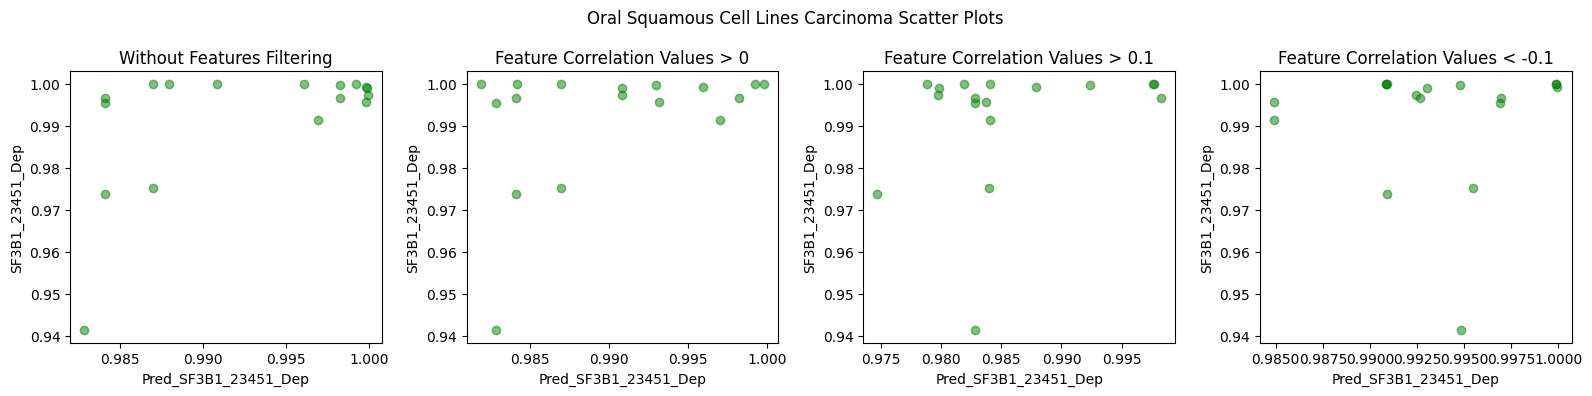

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/KNN_SF3B1_filtered_arranged_table_Oral_Squamous.csv',
    '/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/KNN_SF3B1_Oral_Squamous_gt_00.csv',
    '/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/KNN_SF3B1_Oral_Squamous_gt_01.csv',
    '/content/drive/MyDrive/Colab Notebooks/Oral_Squamous_Cell_Carcinoma/KNN_SF3B1_Oral_Squamous_ng_01.csv'
]

dfs = []  # List to store the DataFrames

# Read each CSV file and append to the list
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('Oral Squamous Cell Lines Carcinoma Scatter Plots')

# Create scatter plots
titles = ['Without Features Filtering', 'Feature Correlation Values > 0', 'Feature Correlation Values > 0.1',
          'Feature Correlation Values < -0.1']

for i, df in enumerate(dfs):
    ax = axs[i]  # Select the subplot
    ax.scatter(df['Pred_SF3B1_23451_Dep'], df['SF3B1_23451_Dep'],c='GREEN',alpha=0.5)
    ax.set_xlabel('Pred_SF3B1_23451_Dep')
    ax.set_ylabel('SF3B1_23451_Dep')
    ax.set_title(titles[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()
